<a href="https://colab.research.google.com/github/dhruvii-i/Electric-Vehicle-Market-Segmentation/blob/main/EV_Market_Segment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import sklearn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# EV Charging Stations in India

In [3]:
df1=pd.read_csv('/content/ev-charging-stations-india.csv')

In [4]:
df1.head()

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.9803,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.0818,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.2760,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.7218,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.7218,12.0


In [5]:
df1.tail()

,name,state,city,address,lattitude,longitude,type
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0
1546,Tata Power,Karnataka,Mangalore,"Auto Matrix, Bejai, Manjusha Building, Bejai, ...",12.885716,74.843476,7.0


In [6]:
df1.isnull().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [7]:
df1.drop('address',inplace=True,axis=1)

In [8]:
df1.drop('type',inplace=True,axis=1)

In [9]:
df1.head()

,name,state,city,lattitude,longitude
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,29.6019,76.9803
1,Galleria DC Charging Station,Haryana,Gurugram,28.4673,77.0818
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,27.8751,76.2760
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,29.3105,77.7218
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,29.3105,77.7218


In [10]:
state_mapping = {
    'Delhi NCR': 'Delhi',
    'Delhi-NCR': 'Delhi',
    'Chattisgarh':'Chhattisgarh',
    'Hyderabadu00a0 ':'Hyderabad',
    'Jajpur  ':'Rajasthan',
    'Jammu ':'Jammu & Kashmir',
    'Jammu and Kashmir ':'Jammu & Kashmir',
    'Karala ':'Kerala',
    'Maharashra ':'Maharashtra',
    'PUNJAB ':'Punjab',
    'Puducherry':'Pondicherry',
    'TAMIL NADU':'Tamil Nadu',
    'TamilNadu':'Tamil Nadu',
    'TamiNadu':'Tamil Nadu',
    'TELANGANA':'Telangana',
    'chattisgarh':'Chattisgarh',
    'Uttarakhand':'Uttarakhand',
    'Uttrakhand':'Uttarakhand',
    'Uttarkhand':'Uttarakhand',
    'WestBengal':'West Bengal',
    'AndhraPradesh ': 'Andhra Pradesh',
    'Andhra Pradesh':'Andhra Pradesh',
    'Andra Pradesh ':'Andhra Pradesh',
    'Andhra pradesh ': 'Andhra Pradesh',
    'Harayana':'Haryana'}



In [11]:
!pip install fuzzywuzzy

In [12]:
from fuzzywuzzy import fuzz

In [13]:
def replace_state_fuzzy(state):
    for variation, standard_name in state_mapping.items():
        if fuzz.partial_ratio(variation.lower(), state.lower()) > 80:  # Adjust the threshold as needed
            return standard_name
    return state

In [14]:
df1['state'] = df1['state'].apply(replace_state_fuzzy)

In [15]:
state_counts = df1.groupby('state').size()

In [16]:
state_counts

state
Andaman              1
Andhra Pradesh      85
Assam               10
Bhubhaneswar         1
Bihar                9
Chandigarh           2
Chhattisgarh        18
Chikhali             1
Delhi              179
Ernakulam            1
Goa                  8
Gujarat             77
Haryana             61
Hisar                1
Hyderabad            2
Jammu & Kashmir      7
Jharkhand           22
Karnataka          134
Kerala              92
Kochi                1
Limbdi               1
Maharashtra        264
Odisha              38
Pondicherry          3
Punjab              24
Rajahmundry          1
Rajasthan           69
Sikkim               2
Tamil Nadu         183
Telangana           80
Tripura              1
Uttar Pradesh       87
Uttarakhand         26
West Bengal         56
dtype: int64

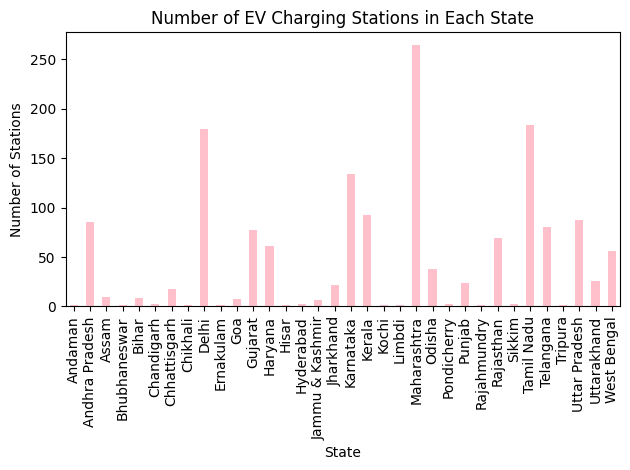

In [17]:
state_counts.plot(kind='bar', color='pink')
plt.xlabel("State")
plt.ylabel("Number of Stations")
plt.title("Number of EV Charging Stations in Each State")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

# TOP STATES CHARGING STATIONS DISTRIBUTION

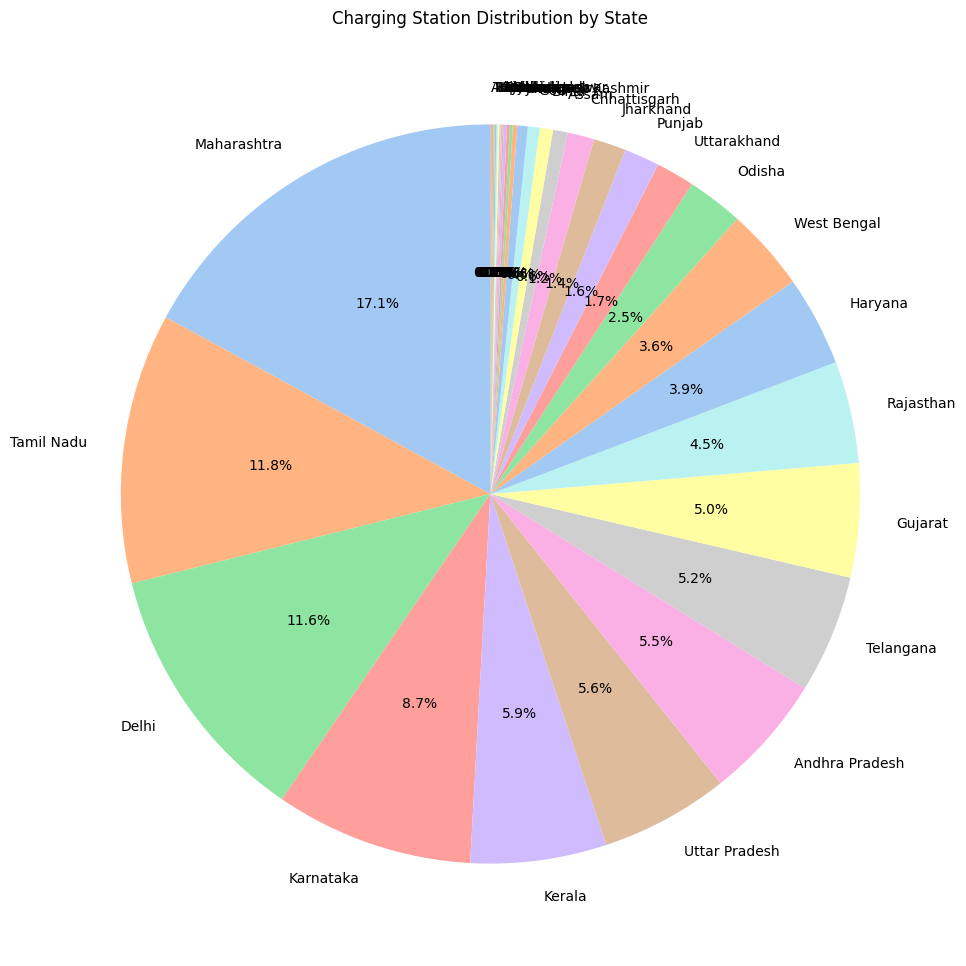

In [18]:
plt.figure(figsize=(12, 12))
state_distribution = df1['state'].value_counts()
state_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Charging Station Distribution by State')
plt.ylabel('')
plt.show()

# Mean inputation of longitude and latitudes

In [19]:
default_lattitude = 0.0
default_longitude = 0.0

df1['lattitude'].fillna(default_lattitude, inplace=True)
df1['longitude'].fillna(default_longitude, inplace=True)

# Display the updated DataFrame
print(df1)

                                                   name            state  \
0                    Neelkanth Star DC Charging Station          Haryana   
1                          Galleria DC Charging Station          Haryana   
2     Highway Xpress (Jaipur-Delhi) DC charging station        Rajasthan   
3                     Food Carnival DC Charging Station    Uttar Pradesh   
4                     Food Carnival AC Charging Station    Uttar Pradesh   
...                                                 ...              ...   
1542                                        Tata Power            Kerala   
1543                                        Tata Power           Haryana   
1544                                        Tata Power           Haryana   
1545                                        Tata Power   Jammu & Kashmir   
1546                                        Tata Power         Karnataka   

           city   lattitude  longitude  
0      Gurugram     29.6019  76.980300  
1    

# City wise Distribution of charging stations

In [20]:
import plotly.express as px

In [21]:
fig = px.bar(
    df1, x='city', color='state',
    labels={'city': 'City', 'state': 'State', 'name': 'Station Name'},
    title='Charging Station Distribution by City',
    hover_data={'name': True, 'state': True, 'city': False}
)

In [22]:
fig.show()

Geographic Segments:


*   The geographic distribution of electric vehicle (EV) charging stations plays a  
crucial role in shaping the EV market. A well-developed charging station can alleviate range anxiety that proves to be a major barrier to EV adoption in India, and encourage EV uptake.
*   By analyzing the geographic segmentation of the EV market based on charging stations, we see that Maharashtra, Delhi, Tamil Nadu are cities with a large no of charging stations where EV Market can be developed. Also some cities like Karnataka and Kerela can also be targeted to uptake Ev market.




# Behavioral Analysis

In [93]:
df2_og=pd.read_csv('/content/Electric Vehicle Dataset(consumerbehaviour).csv')
df2=df2_og.copy()

In [94]:
df2.head()

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


# Data Preprocessing

In [95]:
df2.isnull().sum()

Unnamed:                                                                0
Age                                                                     0
City                                                                    0
Profession                                                              0
Marital Status                                                          0
Education                                                               0
No. of Family members                                                   0
Annual Income                                                           0
Would you prefer replacing all your vehicles to Electronic vehicles?    0
If Yes/Maybe what type of EV would you prefer?                          0
Do you think Electronic Vehicles are economical?                        0
Which brand of vehicle do you currently own?                            0
How much money could you spend on an Electronic vehicle?                0
Preference for wheels in EV           

In [26]:
df2.shape

(1000, 15)

In [96]:
df2['City'].unique()

array(['Nabha', 'Pune', 'Kashipur', 'Satara', 'Noida', 'Delhi', 'Mumbai',
       'pune', 'solapur', 'Haldwani', 'Nellore', 'Banglore', 'Faridabad',
       'Nagpur', 'Chandrapur', 'Chennai', 'Gurugram', 'Nashik',
       'Bengaluru', 'Hakdwani', 'Patiyala', 'pUNE', 'Ahmedabad', 'Karnal',
       'Rewari', 'New Delhi', 'Serampore', 'Jhansi', 'Jalandhar',
       'nashik'], dtype=object)

In [97]:
state_mapping2 = {
    'pUNE': 'Pune',
    'pune': 'Pune',
    'Bengaluru':'Banglore',
    'Delhi':'New Delhi',
    'Hakdwani  ':'Haldwani',
    'nashik ':'Nashik'}

In [98]:
def replace_city_fuzzy(City):
    for variation, standard_name in state_mapping2.items():
        if fuzz.partial_ratio(variation.lower(), City.lower()) > 80:
            return standard_name
    return City

In [99]:
df2['City'] = df2['City'].apply(replace_city_fuzzy)

In [100]:
df2['City'].unique()

array(['Nabha', 'Pune', 'Kashipur', 'Satara', 'Noida', 'New Delhi',
       'Mumbai', 'solapur', 'Haldwani', 'Nellore', 'Banglore',
       'Faridabad', 'Nagpur', 'Chandrapur', 'Chennai', 'Gurugram',
       'Nashik', 'Patiyala', 'Ahmedabad', 'Karnal', 'Rewari', 'Serampore',
       'Jhansi', 'Jalandhar'], dtype=object)

In [101]:
df2['How much money could you spend on an Electronic vehicle?'].unique()

array(['<5 lakhs', '<15 lakhs', '<25 lakhs', '700000', '>25 lakhs',
       '2000000', '1200000', '1500000'], dtype=object)

In [102]:
df2['No. of Family members'].unique()

array([5, 4, 3, 2, 8, 6, 0, 1, 7])

In [103]:
df2.drop('Unnamed: ',axis=1,inplace=True)

In [35]:
df2.describe()

,Age,No. of Family members,Annual Income,Preference for wheels in EV
count,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,31.800000,4.118000,2.258342e+06,3.349000
std,11.294847,1.469774,9.993558e+05,0.887686
min,15.000000,0.000000,-3.761509e+05,2.000000
25%,26.000000,4.000000,1.782116e+06,2.000000
50%,29.000000,4.000000,2.329246e+06,4.000000
75%,31.000000,5.000000,2.753170e+06,4.000000
max,118.000000,8.000000,1.282128e+07,4.000000


In [104]:
df2.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [105]:
df2.columns

Index(['Age', 'City', 'Profession', 'Marital Status', 'Education',
       'No. of Family members', 'Annual Income',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?'],
      dtype='object')

# Profiling and describing Potential Segments:

Text(0, 0.5, 'Count')

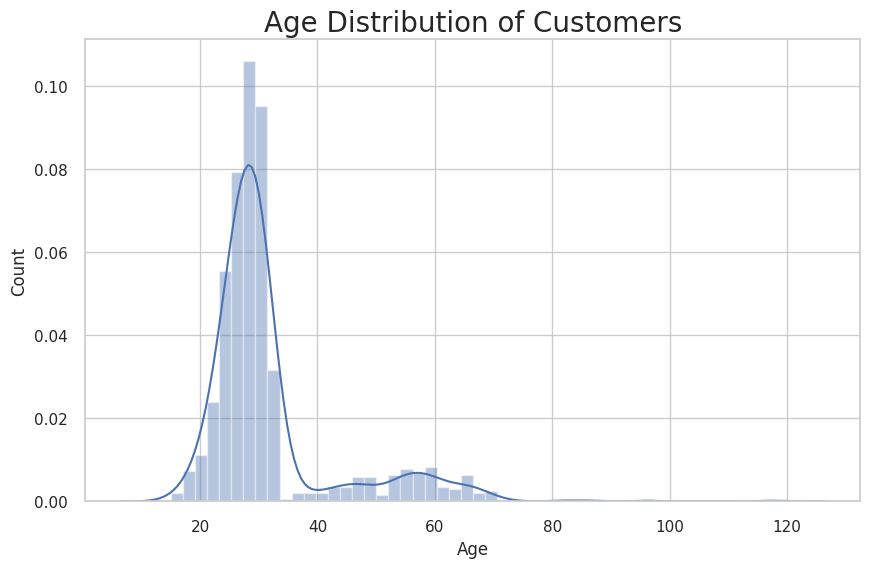

In [111]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df2['Age'])
plt.title('Age Distribution of Customers', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

In [115]:
fig = px.bar(df2, x='City', color='City', title='Location Distribution of Customers by Location',
             labels={'City': 'City', 'count': 'Number of Customers'})

fig.update_layout(xaxis_title='City', yaxis_title='Number of Customers')
fig.show()

Text(0, 0.5, 'Count')

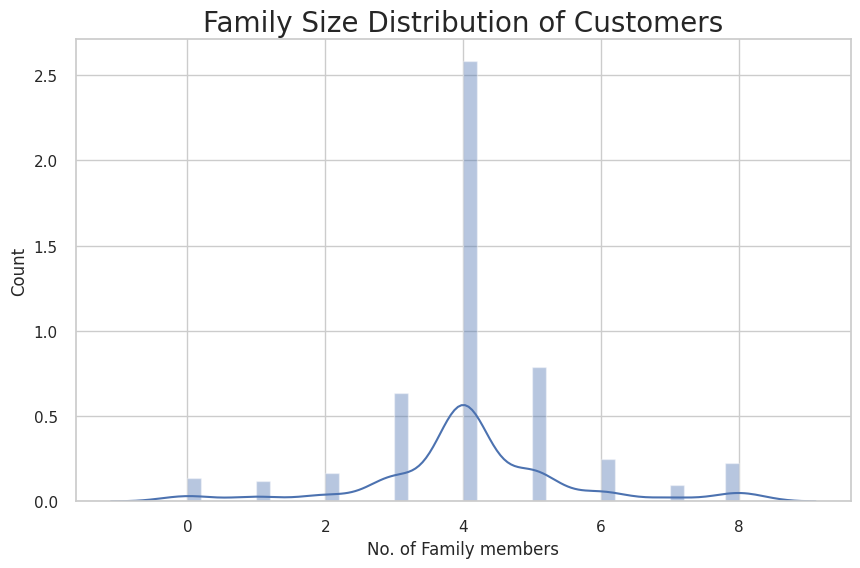

In [116]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df2['No. of Family members'])
plt.title('Family Size Distribution of Customers', fontsize = 20)
plt.xlabel('No. of Family members')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

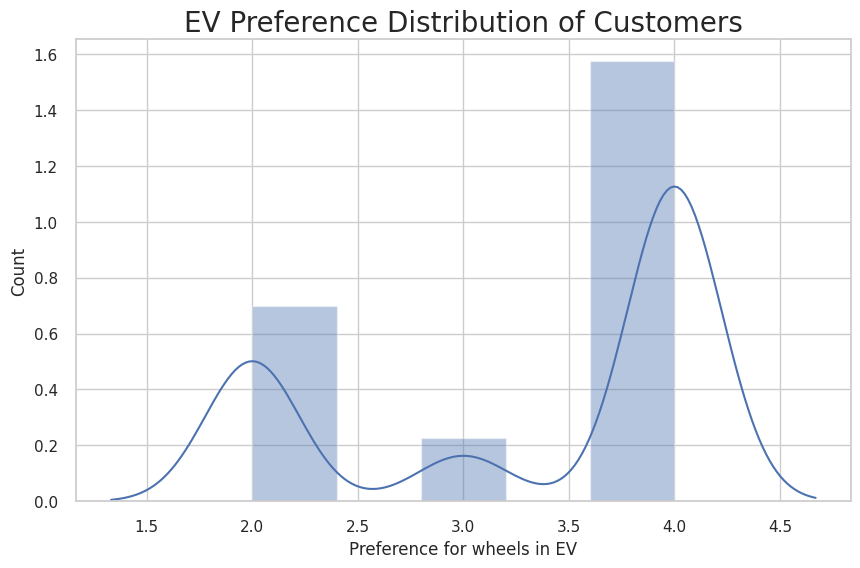

In [120]:
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df2['Preference for wheels in EV'])
plt.title('EV Preference Distribution of Customers', fontsize = 20)
plt.xlabel('Preference for wheels in EV')
plt.ylabel('Count')

In [122]:
fig = px.bar(df2, x='How much money could you spend on an Electronic vehicle?', color='How much money could you spend on an Electronic vehicle?', title='Spending Capacity Distribution of Customers by Location',
             labels={'Spending Capacity': 'How much money could you spend on an Electronic vehicle?', 'count': 'Number of Customers'})

fig.update_layout(xaxis_title='Spending Capacity', yaxis_title='Number of Customers')
fig.show()

In [119]:
fig = px.bar(df2, x='', color='Preference for wheels in EV', title=' Distribution of Customers by Location',
             labels={'EV Preference': 'Preference for wheels in EV', 'count': 'Number of Customers'})

fig.update_layout(xaxis_title='EV Type', yaxis_title='Number of Customers')
fig.show()

In [38]:
fig1 = px.scatter(df2, x='Age', y='Annual Income', color='City', size='No. of Family members',
                  hover_data=['Profession', 'Marital Status'],
                  title='Scatter Plot: Age vs Annual Income')
fig1.show()

We can observe that since people between age 20 and 70 have an annual income ranging till 4M they can be considered as our targeted age group.

CITY WISE ANNUAL INCOME

In [39]:
fig2 = px.bar(df2, x='City', y='Annual Income', color='Marital Status',
              title='Bar Plot: City-wise Annual Income')
fig2.show()

EV Preference vs spending Capacity

In [90]:
fig4 = px.bar(df3,
              y='Would you prefer replacing all your vehicles to Electronic vehicles?',
              x='How much money could you spend on an Electronic vehicle?',
              color='Do you think Electronic Vehicles are economical?',
              title='Box Plot: EV Preference vs Spending Capacity',
              hover_data=['City', 'Age'])
fig4.show()

Ev preference vs car they currently own

In [41]:
fig3 = px.bar(df2, x='Which brand of vehicle do you currently own?',
                 color='Would you prefer replacing all your vehicles to Electronic vehicles?',
                 title='Car Ownership and EV Preference',
                 labels={'Which brand of vehicle do you currently own?': 'Current Car Ownership',
                         'Would you prefer replacing all your vehicles to Electronic vehicles?': 'EV Preference'},
                 hover_data=['Age', 'City', 'Annual Income'])
fig3.show()

We can see alot of people owning cars would prefer changing to EV

In [88]:
fig7 = px.bar(df3, x='Preference for wheels in EV', y='Annual Income', color='Marital Status',
             title='Box Plot: EV Wheels Preference vs. Annual Income by Marital Status')
fig7.show()


City wise preference for buying an EV

In [42]:
df_ev_preference=df2[df2['Would you prefer replacing all your vehicles to Electronic vehicles?']=='Yes']

In [43]:
df_ev_preference

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"
6,23,Pune,Working Professional,Married,Graduate,3,2686745.166,Yes,Sedan,Yes,KIA,<15 lakhs,2,"Yes, in <10 years"
7,25,Pune,None,Married,Post Graduate,4,2034627.333,Yes,Sedan,Yes,MG,<5 lakhs,4,"Yes, in <10 years"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,30,Pune,Business,Single,Graduate,4,2167915.841,Yes,SUV,Maybe,Nexa,<15 lakhs,3,"Yes, in <10 years"
994,67,Pune,Working Professional,Married,Graduate,4,1123211.574,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years"
995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years"
997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"


In [44]:
fig5= px.bar(df_ev_preference, x='City',
                                title='City-wise Preference for Buying an EV',
                                labels={'City': 'City', 'count': 'Number of Prefrences'},
                                color_discrete_sequence=['red'])
fig5.update_xaxes(tickangle=90)
fig5.show()

From the above graph we can infer that Pune is the city where people most prefer to buy an EV.

In [45]:
fig6 = px.bar(df2, x='Age', y='Preference for wheels in EV',
                                  color='Preference for wheels in EV', hover_data=['How much money could you spend on an Electronic vehicle?','City'],
                 labels={'How much money could you spend on an Electronic vehicle?': 'Spending Capacity on EV'},
                 title='Bar Chart: Age vs Preference of wheels in EV ')
fig6.show()

CORRELATION HEATMAP

<Axes: >

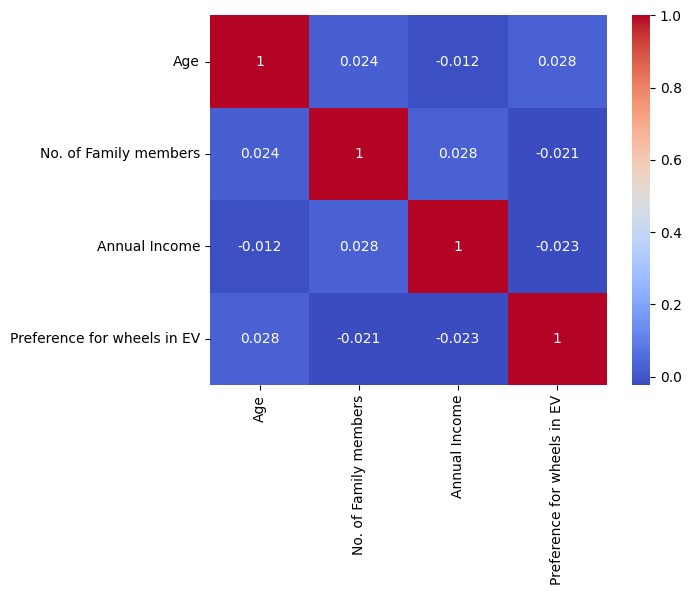

In [46]:
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm')

# LABEL ENCODING

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [49]:
df2['City']= label_encode(df2,'City')
df2['Profession']= label_encode(df2,'Profession')
df2['Marital Status']= label_encode(df2,'Marital Status')
df2['Education']= label_encode(df2,'Education')
df2['Would you prefer replacing all your vehicles to Electronic vehicles?']= label_encode(df2,'Would you prefer replacing all your vehicles to Electronic vehicles?')
df2['If Yes/Maybe what type of EV would you prefer?']= label_encode(df2,'If Yes/Maybe what type of EV would you prefer?')
df2['Do you think Electronic Vehicles are economical?']= label_encode(df2,'Do you think Electronic Vehicles are economical?')
df2['Which brand of vehicle do you currently own?']= label_encode(df2,'Which brand of vehicle do you currently own?')
df2['Do you think Electronic vehicles will replace fuel cars in India?']= label_encode(df2,'Do you think Electronic vehicles will replace fuel cars in India?')
df2['How much money could you spend on an Electronic vehicle?']= label_encode(df2,'How much money could you spend on an Electronic vehicle?')

In [50]:
df2.head()

,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,12,1,1,0,5,1193875.647,0,3,2,4,6,2,0
1,27,19,1,1,0,4,1844540.398,2,3,2,3,4,4,2
2,32,10,1,1,0,4,2948150.113,2,1,2,5,4,4,2
3,55,19,0,1,0,3,2832379.739,0,1,1,4,6,4,1
4,26,21,1,1,0,4,2638750.576,2,4,2,9,4,4,2


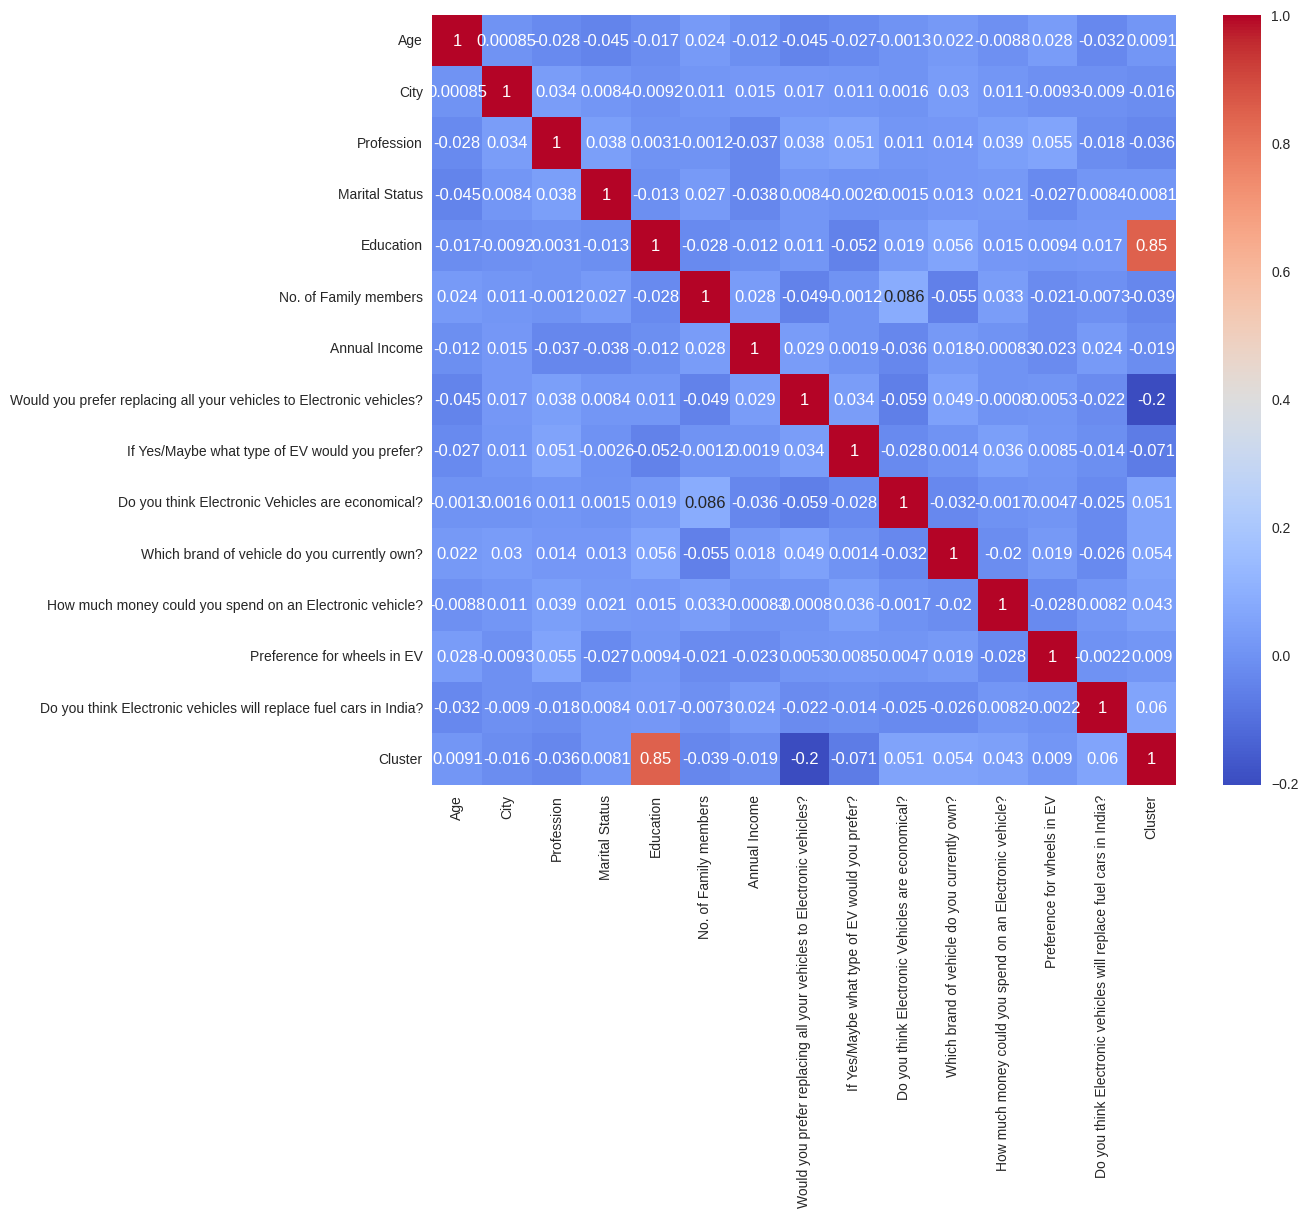

In [80]:
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True,cmap='coolwarm')
plt.show()

# K MEANS CLUSTERING MODEL

In [52]:
x=df2.iloc[:,:-1]

In [53]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [54]:
scaler=StandardScaler()
scaled_df2=scaler.fit_transform(df2)

In [55]:
scaled_df2

array([[-0.15944445, -0.7725497 , -0.48396021, ...,  1.06155004,
        -1.52044139, -2.00182632],
       [-0.42518519,  0.5435486 , -0.48396021, ..., -0.5753814 ,
         0.73373413,  0.51777887],
       [ 0.01771605, -1.14857779, -0.48396021, ..., -0.5753814 ,
         0.73373413,  0.51777887],
       ...,
       [-0.15944445, -0.96056375, -1.37687572, ..., -0.5753814 ,
         0.73373413,  0.51777887],
       [-0.69092594, -3.02871822, -0.48396021, ..., -0.5753814 ,
         0.73373413,  0.51777887],
       [-0.15944445,  0.5435486 , -1.37687572, ...,  1.06155004,
         0.73373413, -0.74202373]])

In [56]:
!pip install yellowbrick

In [57]:
from yellowbrick.cluster import KElbowVisualizer

In [58]:
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++",random_state=28)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

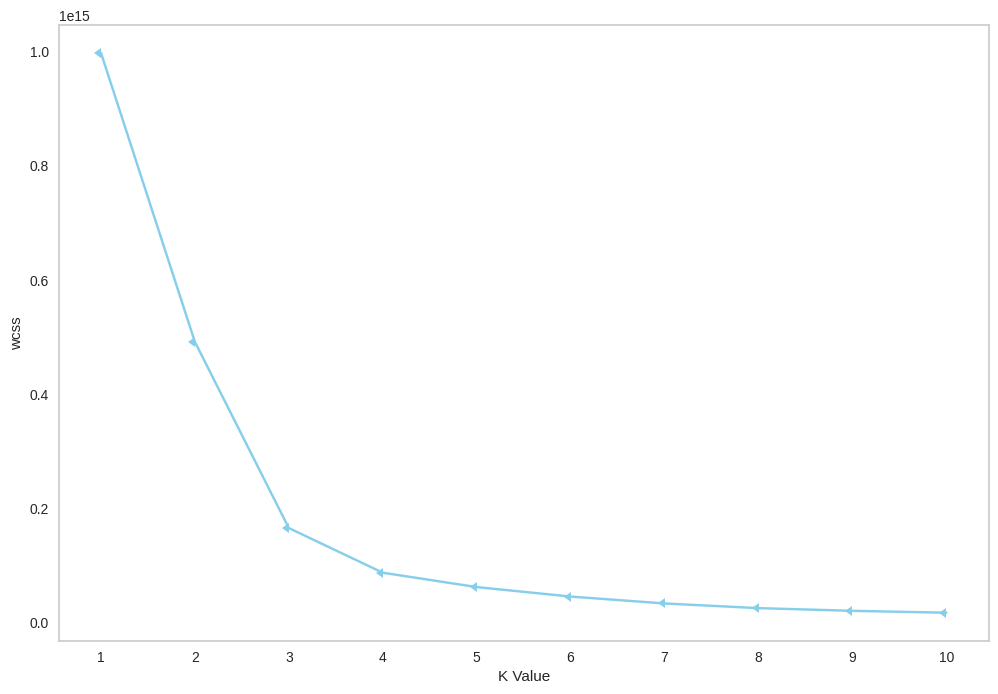

In [59]:
plt.figure(figsize=(12,8))
plt.grid()
plt.plot(range(1,11),wcss,color='skyblue',marker=8)
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel('wcss')
plt.show()

In [60]:
optimal_k=3

In [61]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters= kmeans.fit_predict(scaled_df2)
df2['Cluster']=clusters

In [62]:
df2_og['Cluster']=clusters

In [63]:
from mpl_toolkits.mplot3d import Axes3D

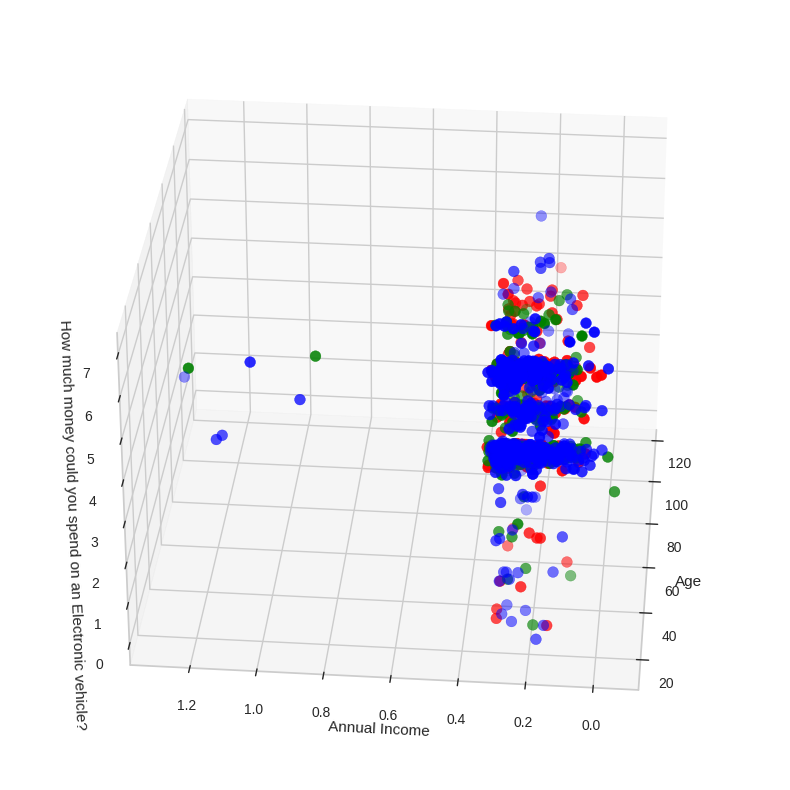

In [92]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2.Age[df2.Cluster == 0], df2["Annual Income"][df2.Cluster == 0], df2["How much money could you spend on an Electronic vehicle?"][df2.Cluster == 0], c='blue', s=60)
ax.scatter(df2.Age[df2.Cluster == 1], df2["Annual Income"][df2.Cluster == 1], df2["How much money could you spend on an Electronic vehicle?"][df2.Cluster == 1], c='red', s=60)
ax.scatter(df2.Age[df2.Cluster == 2], df2["Annual Income"][df2.Cluster == 2], df2["How much money could you spend on an Electronic vehicle?"][df2.Cluster == 2], c='green', s=60)


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('How much money could you spend on an Electronic vehicle?')
plt.show()

MAJORITY CUSTOMERS BELONG TO CLUSTER 0 AND 1

In [65]:
df3=df2_og.copy()
df3

,Unnamed:,Age,City,Profession,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Cluster
0,0,30,Nabha,None,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so,1
1,1,27,Pune,None,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",0
2,2,32,Kashipur,None,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years",0
3,3,55,Pune,Business,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years",1
4,4,26,Satara,None,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,Pune,None,Married,Graduate,7,2110722.120,Yes,SUV,Yes,KIA,<25 lakhs,4,"Yes, in <10 years",0
996,996,29,Pune,None,Married,Post Graduate,4,1616287.706,No,SUV,Yes,KIA,<5 lakhs,4,"Yes, in <20years",2
997,997,30,Mumbai,Business,Single,Graduate,4,2202829.029,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years",0
998,998,24,Ahmedabad,None,Married,Graduate,4,1764744.068,Yes,SUV,Yes,Maruti,<15 lakhs,4,"Yes, in <20years",0


In [66]:
df3["City"] = df3["City"].replace({"Pune":"Pune", "pUNE": "Pune", "pune": "Pune", "Pune ": "Pune"})
df3["City"] = df3["City"].replace({"Mumbai ":"Mumbai", "Mumbai": "Mumbai"})
df3["City"] = df3["City"].replace({"Banglore ":"Bengaluru"})
df3["City"] = df3["City"].replace({"Delhi":"New Delhi", "Delhi ": "New Delhi", "New Delhi ": "New Delhi"})
df3["City"] = df3["City"].replace({"Hakdwani":"Haldwani", "Haldwani ": "Haldwani"})
df3["City"] = df3["City"].replace({"nashik":"Nashik"})

In [67]:
df3['Cluster'].value_counts()

0    495
1    258
2    247
Name: Cluster, dtype: int64

Cluster 0 has majority number of customers followed by Cluster 1 and CLuster 2

In [68]:
Cluster_0 = df3[df3.Cluster==0]
Cluster_1 = df3[df3.Cluster==1]
Cluster_2 = df3[df3.Cluster==2]

In [69]:
[Cluster_0['Age'].value_counts().head(3),
 Cluster_1['Age'].value_counts().head(3),
 Cluster_2['Age'].value_counts().head(3)]

[30    55
 29    55
 31    47
 Name: Age, dtype: int64,
 29    35
 30    25
 31    22
 Name: Age, dtype: int64,
 28    35
 29    26
 30    25
 Name: Age, dtype: int64]

**Based on Cluster 0 & 1, Age group of 29-31 are to be targeted **

In [70]:
[Cluster_0['City'].value_counts().head(),
 Cluster_1['City'].value_counts().head(),
 Cluster_2['City'].value_counts().head()]

[Pune         311
 New Delhi     27
 Mumbai        24
 Haldwani      14
 Satara        13
 Name: City, dtype: int64,
 Pune         154
 Mumbai        16
 New Delhi     16
 Nagpur        12
 Satara         6
 Name: City, dtype: int64,
 Pune         156
 Mumbai        16
 New Delhi     14
 Haldwani       8
 Banglore       5
 Name: City, dtype: int64]

Pune, Delhi & Mumbai are present in all the clusters with Pune being the highest count.


1. 'Pune', 'Delhi' & 'Mumbai' are the most suitable cities to start an early market in EV segment.
2. Satara and Haldwani should be next priority (As they are present in 2 of 3 Clusters).
3. Followed by Nagpur and Banglore.

The city should have enough charging stations which can be analysed from charging stations across india dataset.

In [71]:
[Cluster_0['Annual Income'].mean(),
 Cluster_1['Annual Income'].mean(),
 Cluster_2['Annual Income'].mean()]

[2292114.599053636, 2190631.836837054, 2261384.9527684213]

Cluster 0 customers have Higher Average Income(Rs. 2292114.59), Cluster 1 & 2 have lower Average Income comparitively.

In [72]:
[Cluster_0['Marital Status'].value_counts().head(),
 Cluster_1['Marital Status'].value_counts().head(),
 Cluster_2['Marital Status'].value_counts().head()]

[Single     312
 Married    183
 Name: Marital Status, dtype: int64,
 Single     169
 Married     89
 Name: Marital Status, dtype: int64,
 Single     157
 Married     90
 Name: Marital Status, dtype: int64]

In [73]:
status_df=Cluster_0[Cluster_0['Marital Status']=='Single']
status_df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes    292
No      20
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

People with Single Marital Status should be targeted.

In [74]:
[Cluster_0['No. of Family members'].value_counts().head(),
 Cluster_1['No. of Family members'].value_counts().head(),
 Cluster_2['No. of Family members'].value_counts().head()]

[4    256
 5     73
 3     63
 6     25
 8     23
 Name: No. of Family members, dtype: int64,
 4    128
 5     44
 3     31
 8     18
 6     17
 Name: No. of Family members, dtype: int64,
 4    132
 5     41
 3     33
 0      9
 2      8
 Name: No. of Family members, dtype: int64]

In [75]:
status_df=Cluster_0[Cluster_0['No. of Family members']=='4']
status_df['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Series([], Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64)

Customers with 3-5 Family Members can be targeted due to their interest in EV

In [76]:
[Cluster_0['Education'].value_counts().head(),
 Cluster_1['Education'].value_counts().head(),
 Cluster_2['Education'].value_counts().head()]

[Graduate    495
 Name: Education, dtype: int64,
 Graduate         198
 Post Graduate     60
 Name: Education, dtype: int64,
 Post Graduate    247
 Name: Education, dtype: int64]

In [77]:
edu=Cluster_0[Cluster_0['Education']=='Graduate']
edu['Would you prefer replacing all your vehicles to Electronic vehicles?'].value_counts()

Yes    456
No      39
Name: Would you prefer replacing all your vehicles to Electronic vehicles?, dtype: int64

Graduates can be targeted as they prefer switching to EVs

In [78]:
print(Cluster_0['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_1['How much money could you spend on an Electronic vehicle?'].value_counts().head())
print(Cluster_2['How much money could you spend on an Electronic vehicle?'].value_counts().head())

<15 lakhs    248
<5 lakhs     133
<25 lakhs     71
>25 lakhs     17
1500000        7
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    116
<5 lakhs      83
<25 lakhs     41
1200000        6
>25 lakhs      6
Name: How much money could you spend on an Electronic vehicle?, dtype: int64
<15 lakhs    119
<5 lakhs      72
<25 lakhs     36
>25 lakhs     11
700000         3
Name: How much money could you spend on an Electronic vehicle?, dtype: int64


*  Considering Clusters 0 and 1 with a total of 728 cutomers.
*   50% customers out of 728 (i.e 364) want to invest <15 lakhs in EV.
* 216 of them want to incest <5 lakhs.
* Very few people want to invest more than 25 Lakhs and 112 customers are wanting to invest less than 25 Lakhs.








*   **Demographic Segments:**


1.   Age Target: Group of 29-31
2.   Target Graduate Customers
3.   Target People with Income around 2o Lakhs to 23 Lakhs approx

*   **Geographic Segments:**
1.  Based on segmentation analysis of customers in various cities and charging stations avalibility across these cities Pune, Mumbai, Banglore and Delhi.

* **Behavioural Segmentation:**

1. Customers with single marital status should be targeted
2. Family Customers with 3-5 members should be targeted.

